In [8]:
import torch
import torch.nn.functional as F
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Example of doing affine transformation on images 

In [1]:

# Load image
img = Image.open('cat.jpg')
img = torch.tensor(np.array(img)).permute(2, 0, 1).unsqueeze(0).float() / 255

# Define transformation matrix
theta = torch.tensor([[[0.5, 0, 0], [0, 0.5, 0]]])

# Convert matrix to transformation grid
grid = F.affine_grid(theta, img.size())

# Apply transformation to image
output = F.grid_sample(img, grid)

# Convert output tensor to PIL image and save
output = output.squeeze().permute(1, 2, 0).numpy() * 255
output = Image.fromarray(output.astype(np.uint8))
# output.save('output.jpg')

/home/hoang/anaconda3/envs/deep_papers/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/hoang/anaconda3/envs/deep_papers/lib/python3.7/site-packages/torch/nn/functional.py:4278: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/home/hoang/anaconda3/envs/deep_papers/lib/python3.7/site-packages/torch/nn/functional.py:4216: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and aff

# Instruction
- Input: image tensor.
- Grid: represent the position of the pixel from the input image in the output. Value of cooridinate is normalized between [-1, 1]. If values are out of range, it will be padded with values specify in by the padding parameters.
- The interpolation (bilinear) will be perform on the pixel in the input image, its coordinate is given by the grid.
- Then we obtain the value for the output image.

torch.Size([1, 360, 543, 2])


/home/hoang/anaconda3/envs/deep_papers/lib/python3.7/site-packages/torch/nn/functional.py:4278: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


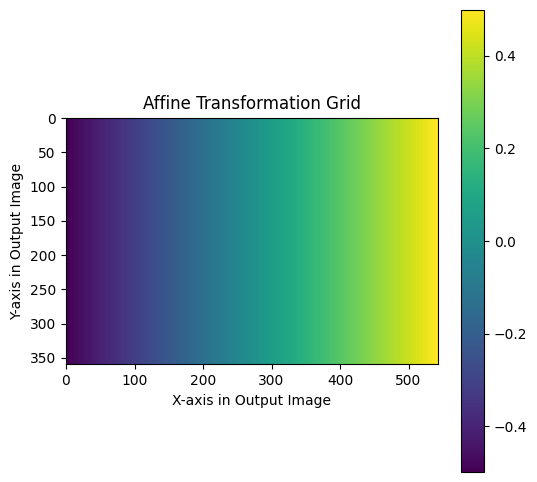

In [13]:
grid = F.affine_grid(theta, img.size())
print(grid.size())
grid = grid.squeeze().numpy()

# Display the grid
plt.figure(figsize=(6, 6))
plt.imshow(grid[:, :, 0], cmap='viridis')
plt.colorbar()
plt.title('Affine Transformation Grid')
plt.xlabel('X-axis in Output Image')
plt.ylabel('Y-axis in Output Image')
plt.show()

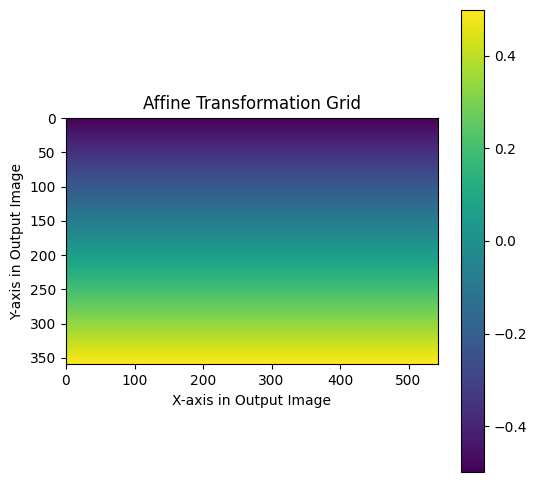

In [14]:
plt.figure(figsize=(6, 6))
plt.imshow(grid[:, :, 1], cmap='viridis')
plt.colorbar()
plt.title('Affine Transformation Grid')
plt.xlabel('X-axis in Output Image')
plt.ylabel('Y-axis in Output Image')
plt.show()

In [2]:
print(img.size())

torch.Size([1, 3, 360, 543])


In [5]:
# print(type(output))
print(output.size)

(543, 360)


# Example of transformation on matrix,

It is easier to understand in this example, the grid has size 2x2x2. The first 2x2 represent the size of output and the last is the (x, y) coordiates which to be interpolated in the input image.

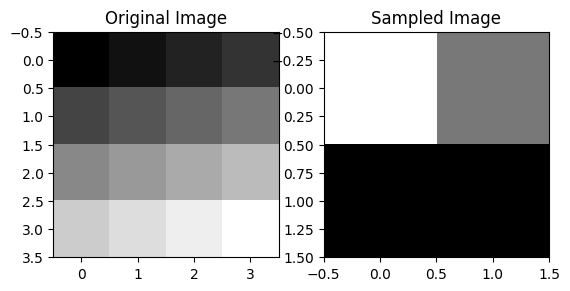

In [17]:



# Create a sample image (1 channel, 4x4)
image = torch.tensor([[1.0, 2.0, 3.0, 4.0],
                      [5.0, 6.0, 7.0, 8.0],
                      [9.0, 10.0, 11.0, 12.0],
                      [13.0, 14.0, 15.0, 16.0]])

# Create a sample grid (2x2, representing coordinates in the image)
# Value over range [-1, 1] is padded with zeros
grid = torch.tensor([[[0.0, 0.0], [1.0, 1.0]],
                     [[2.0, 2.0], [3.0, 3.0]]])  # This grid will map 4 points in the image

# Apply grid_sample to sample points from the image
output = F.grid_sample(image.unsqueeze(0).unsqueeze(0), grid.unsqueeze(0))

# The result will be a sampled image
sampled_image = output.squeeze()

# Display the original and sampled images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sampled_image, cmap='gray')
plt.title('Sampled Image')

plt.show()



In [20]:
print(image.size())

torch.Size([4, 4])


In [23]:
print(grid.unsqueeze(0).size())
print(grid)

torch.Size([1, 2, 2, 2])
tensor([[[0., 0.],
         [1., 1.]],

        [[2., 2.],
         [3., 3.]]])


In [22]:
print(sampled_image.size())
print(sampled_image)

torch.Size([2, 2])
tensor([[8.5000, 4.0000],
        [0.0000, 0.0000]])
